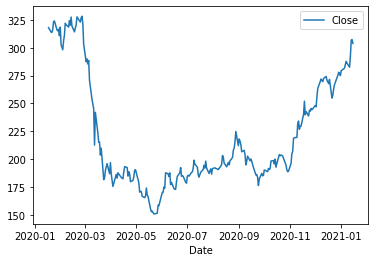

In [3]:
import pandas as pd
import numpy as np
# pip install nsetools;
from nsetools import Nse
nse=Nse()
# q=nse.get_quote('KANSAINER')
# from pprint import pprint
# pprint(q)
# top_gainers = nse.get_top_gainers()
# pip install nsepy;
from nsepy import get_history
from datetime import date
# data = get_history(symbol="SBIN", start=date(2021,1,1), end=date(2021,1,21))

# pip install python-dateutil
import dateutil.relativedelta
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
to_date=datetime.now()
to_date=datetime.strftime(to_date, "%Y %m, %d")
to_date=datetime.strptime(to_date, "%Y %m, %d")
days_to_subtract=365
from_date=to_date-timedelta(days=days_to_subtract)
data = get_history(symbol="SBIN", start=from_date, end=to_date)
data[['Close']].plot()
data.index = pd.to_datetime(data.index)

In [ ]:
# pip install stockstats

from stockstats import StockDataFrame as Sdf

stock_df = Sdf.retype(data)

data['rsi']=stock_df['rsi_14']

del data['close_-1_s']
del data['close_-1_d']
del data['rs_14']
del data['rsi_14']

data['macd']=stock_df['macd']
data['macdh']=stock_df['macdh']
data['macds']=stock_df['macds']

plt.plot(data['macds'],zorder=1)
plt.plot(data['macd'],zorder=2)

def intersection(lst_1,lst_2):
    intersections = []
    insights = []
    if len(lst_1) > len(lst_2):
        settle = len(lst_2)
    else:
        settle = len(lst_1)
    for i in range(settle-1):
        if (lst_1[i+1] < lst_2[i+1]) != (lst_1[i] < lst_2[i]):
            if ((lst_1[i+1] < lst_2[i+1]),(lst_1[i] < lst_2[i])) == (True,False):
                insights.append('buy')
            else:
                insights.append('sell')
            intersections.append(i)
    return intersections,insights
intersections,insights = intersection(data["macds"],data["macd"])

profit = 0
pat = 1
for i in range(len(intersections)-pat):
    index = intersections[i]
    true_trade= None
    if data['close'][index] < data['close'][index+pat]:
        true_trade = 'buy'
    elif data['close'][index] > data['close'][index+pat]:
        true_trade = 'sell'
    if true_trade != None:
        if insights[i] == true_trade:
            profit += abs(data['close'][index]-data['close'][index+1]) 
        if insights[i] != true_trade:
            profit += -abs(data['close'][index]-data['close'][index+1])
